## Object detection
https://python.deepstack.cc/object-detection

Run with:
```
docker run -e VISION-DETECTION=True -v localstorage:/datastore -p 5000:5000 -d deepquestai/deepstack:noavx
```

In [1]:
ls

Deepstack face dev.ipynb          face_0.jpg
Deepstack object detection.ipynb  face_1.jpg
adele_test.jpg                    face_2.jpg
adele_train.jpg                   face_3.jpg
bad.jpg                           family.jpg
boxed_img.jpg                     test-image3.jpg


In [2]:
import requests
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
%matplotlib inline

IP = "localhost"
PORT = "5000"

TARGET = 'person'

In [3]:
img_file = "test-image3.jpg" # bounding boxes are wrong..
# img_file = "family.jpg" # also bounding boxes are wrong..

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(960, 640)


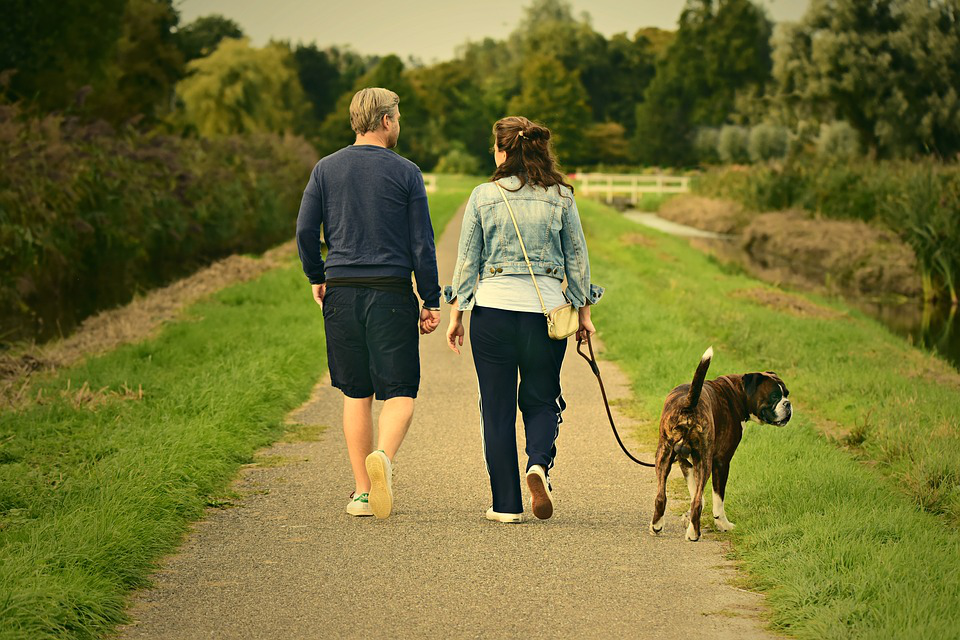

In [4]:
image = Image.open(img_file)
print(type(image))
print(image.size)
display(image)

In [5]:
image_data = open(img_file,"rb").read()
response = requests.post(f"http://{IP}:{PORT}/v1/vision/detection", files={"image":image_data})

In [6]:
response.status_code

200

In [7]:
response.json()

{'success': True,
 'predictions': [{'confidence': 0.9995428,
   'label': 'person',
   'y_min': 95,
   'x_min': 295,
   'y_max': 523,
   'x_max': 451},
  {'confidence': 0.9994912,
   'label': 'person',
   'y_min': 99,
   'x_min': 440,
   'y_max': 531,
   'x_max': 608},
  {'confidence': 0.9990447,
   'label': 'dog',
   'y_min': 358,
   'x_min': 647,
   'y_max': 539,
   'x_max': 797}]}

In [8]:
predictions = response.json()['predictions']

In [9]:
len(predictions)

3

In [10]:
def get_object_classes(predictions):
    """
    Get a list of the unique object classes predicted.
    """
    classes = [pred['label'] for pred in predictions]
    return set(classes)

In [11]:
classes = get_object_classes(predictions)
classes

{'dog', 'person'}

In [12]:
def get_object_instances(predictions, target):
    """
    Return the number of instances of a target class.
    """
    targets_identified = [pred for pred in predictions if pred['label'] == target]
    return len(targets_identified)

In [13]:
get_object_instances(predictions, TARGET)

2

In [14]:
def get_objects_summary(predictions):
    """
    Get a summary of the objects detected.
    """
    classes = get_object_classes(predictions)
    return {class_cat : get_object_instances(predictions, target=class_cat) 
            for class_cat in classes}

In [15]:
get_objects_summary(predictions)

{'dog': 1, 'person': 2}

## Display boxes

In [16]:
def get_bounding_box(prediction):
    """
    Returns the bounding box array
    """
    x1 = prediction['x_min']
    x2 = prediction['x_max']
    y1 = prediction['y_min']
    y2 = prediction['y_max']
    return [x1, y1, x2, y2]

test_prediction = {'confidence': 99,
  'label': 'person',
  'y_min': 89,
  'x_min': 297,
  'y_max': 513,
  'x_max': 444}

get_bounding_box(test_prediction)

[297, 89, 444, 513]

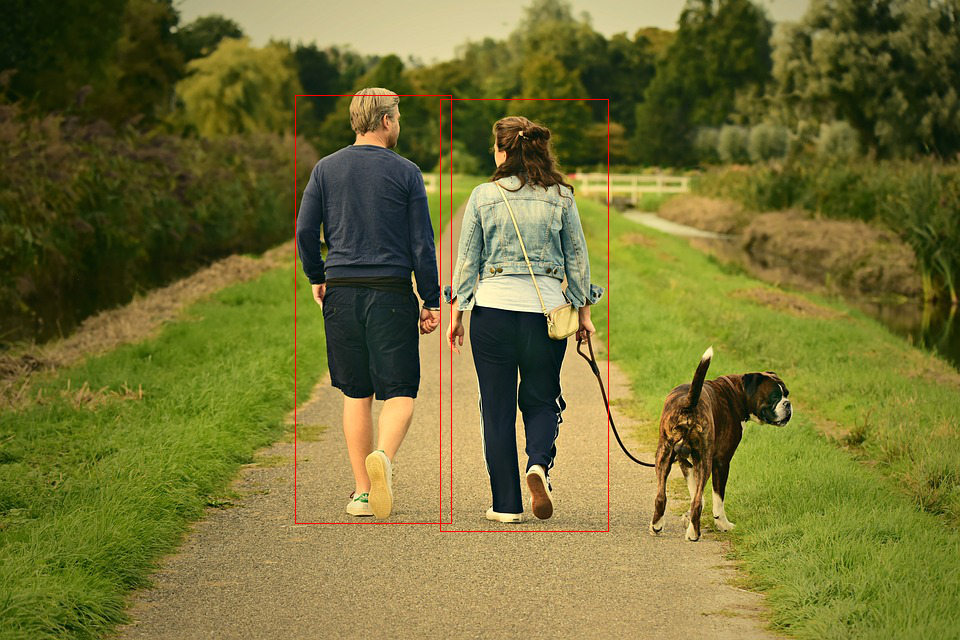

In [17]:
draw = ImageDraw.Draw(image)

for prediction in predictions:
    if prediction['label'] == TARGET:
        draw.rectangle(get_bounding_box(prediction), outline='red')
    
display(image)

In [18]:
image.save('boxed_img.jpg')

Issue for boxes -> https://forum.deepstack.cc/t/bounding-boxes-are-wrong/77/2

In [19]:
test = {'a':1}

In [22]:
result = test.get('b')

In [23]:
result

In [21]:
a = None
b = 2 

In [22]:
if a and b > 0:
    print(True)